In [ ]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/IMDb Movies India.csv",encoding='latin')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
missing_count = df.isnull().sum().sort_values(ascending=False)
print(missing_count)


Duration    8269
Rating      7590
Votes       7589
Actor 3     3144
Actor 2     2384
Genre       1877
Actor 1     1617
Year         528
Director     525
Name           0
dtype: int64


In [ ]:
df.dropna(subset=['Rating'], inplace=True)
(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

,0
Duration,26.11
Actor 3,3.69
Actor 2,2.53
Actor 1,1.58
Genre,1.29
Director,0.06
Name,0.00
Year,0.00
Rating,0.00
Votes,0.00


In [ ]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)

(round(df.isnull().sum()/df.isnull().count(), 4)*100).sort_values(ascending=False)

,0
Duration,25.13
Name,0.00
Year,0.00
Genre,0.00
Rating,0.00
Votes,0.00
Director,0.00
Actor 1,0.00
Actor 2,0.00
Actor 3,0.00


In [ ]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,1899
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(7558, 10)

In [ ]:

year_list = []
for year in df['Year']:
    try:
        year_list.append(int(year.split('(')[1].split(')')[0]))
    except:
        year_list.append(np.nan)
df['Year'] = year_list
df['Votes'] = df['Votes'].str.replace(',', '')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Year'] = df['Year'].astype('Int64')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   Int64  
 2   Duration  5659 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: Int64(1), float64(1), int64(1), object(7)
memory usage: 656.9+ KB


In [ ]:
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


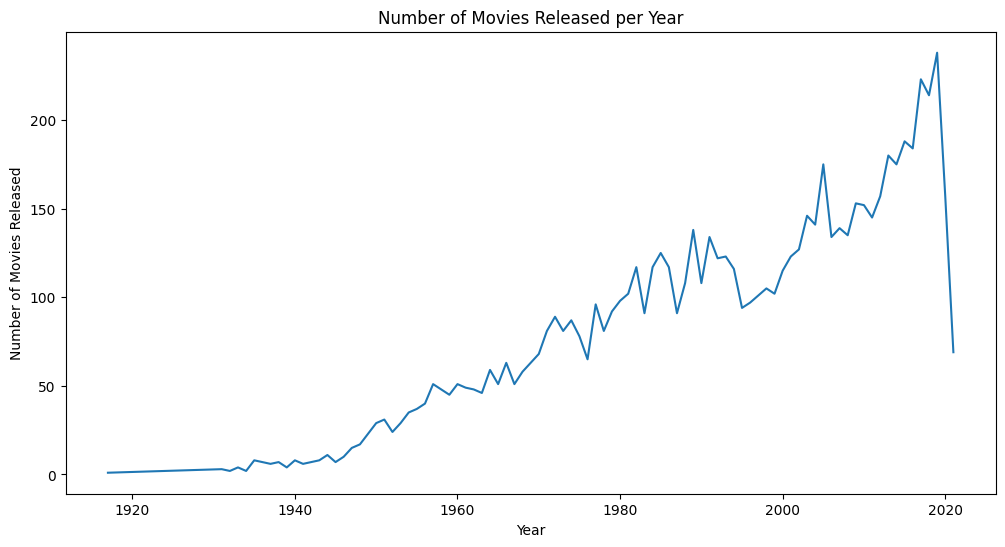

In [ ]:
import matplotlib.pyplot as plt
# Count the number of movies released each year
movies_per_year = df['Year'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.title("Number of Movies Released per Year")
plt.show()


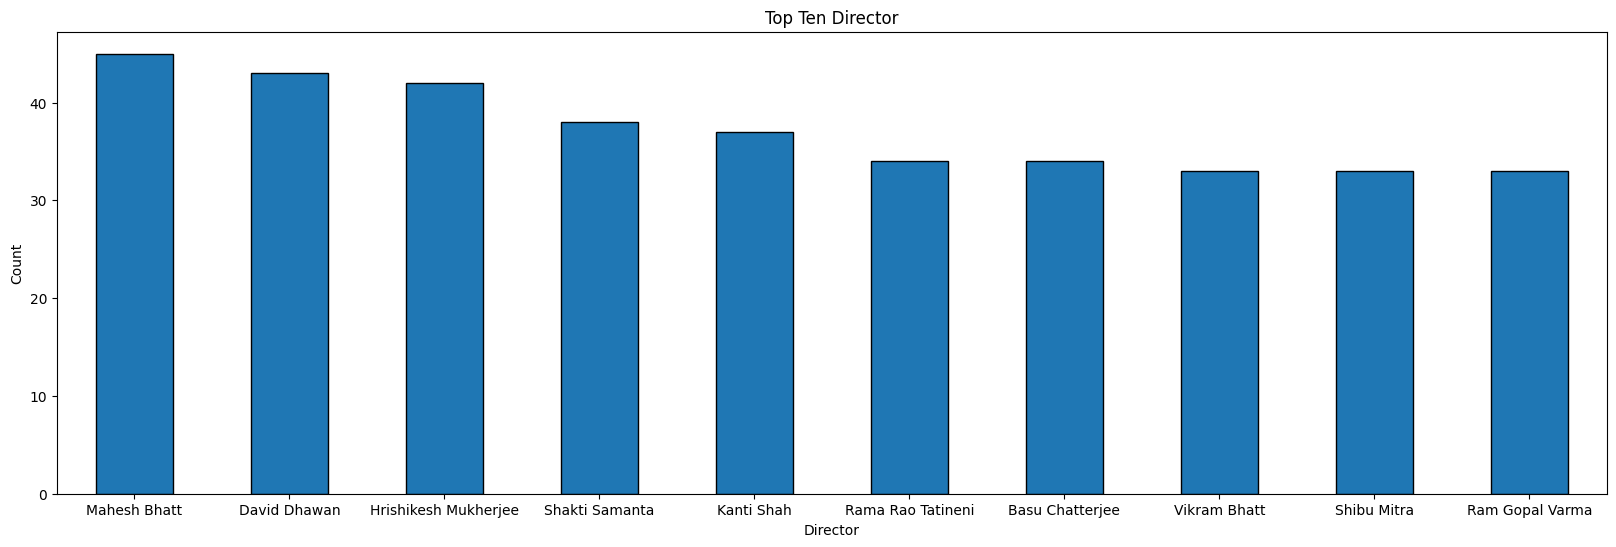

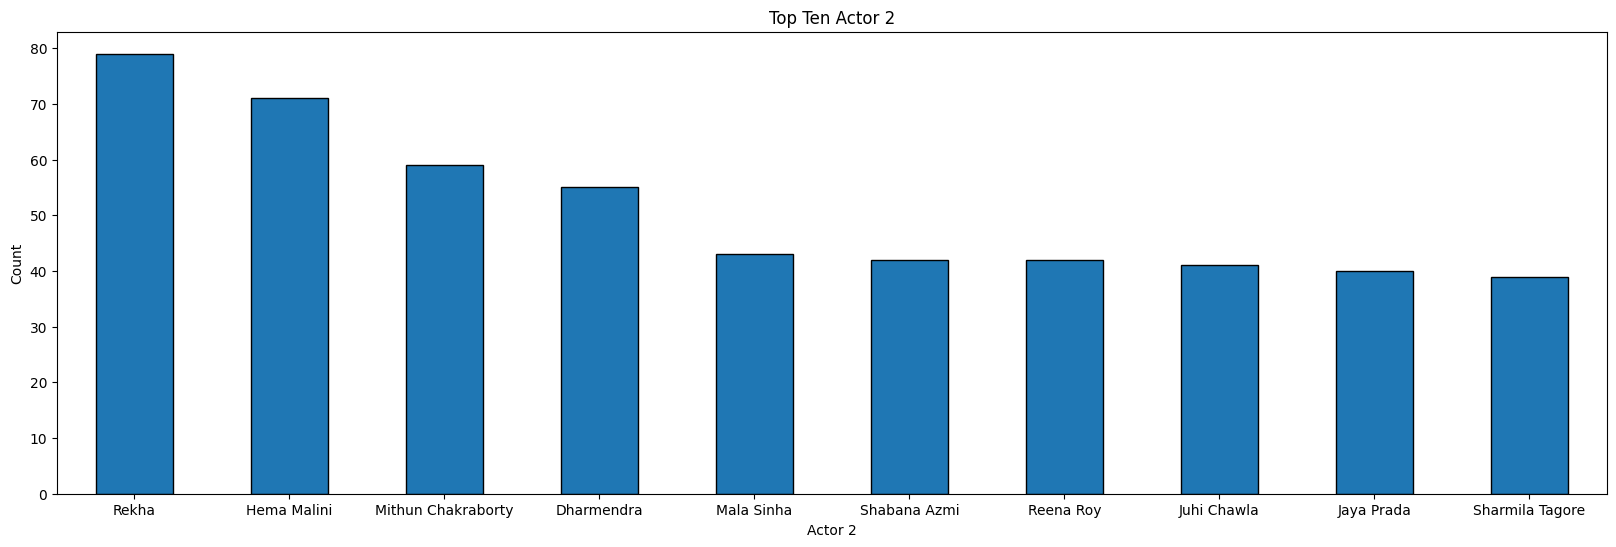

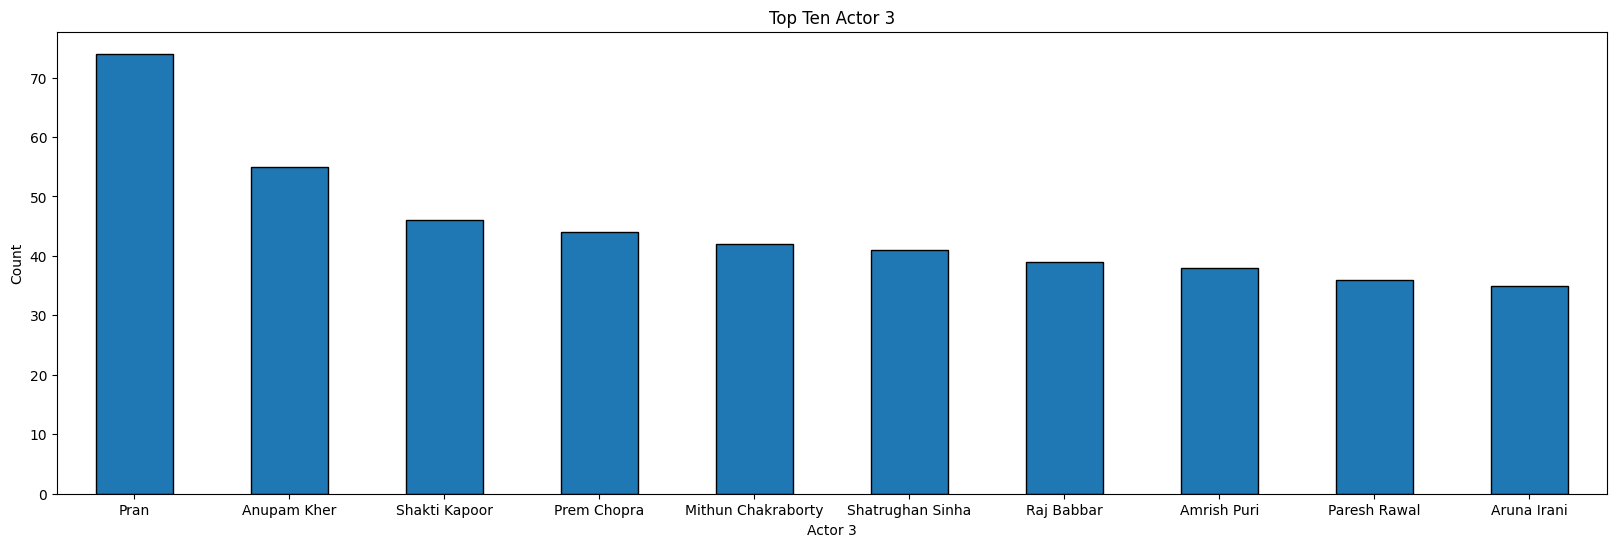

In [ ]:
def TopTenPlot(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

TopTenPlot("Director")
TopTenPlot("Actor 2")
TopTenPlot("Actor 3")

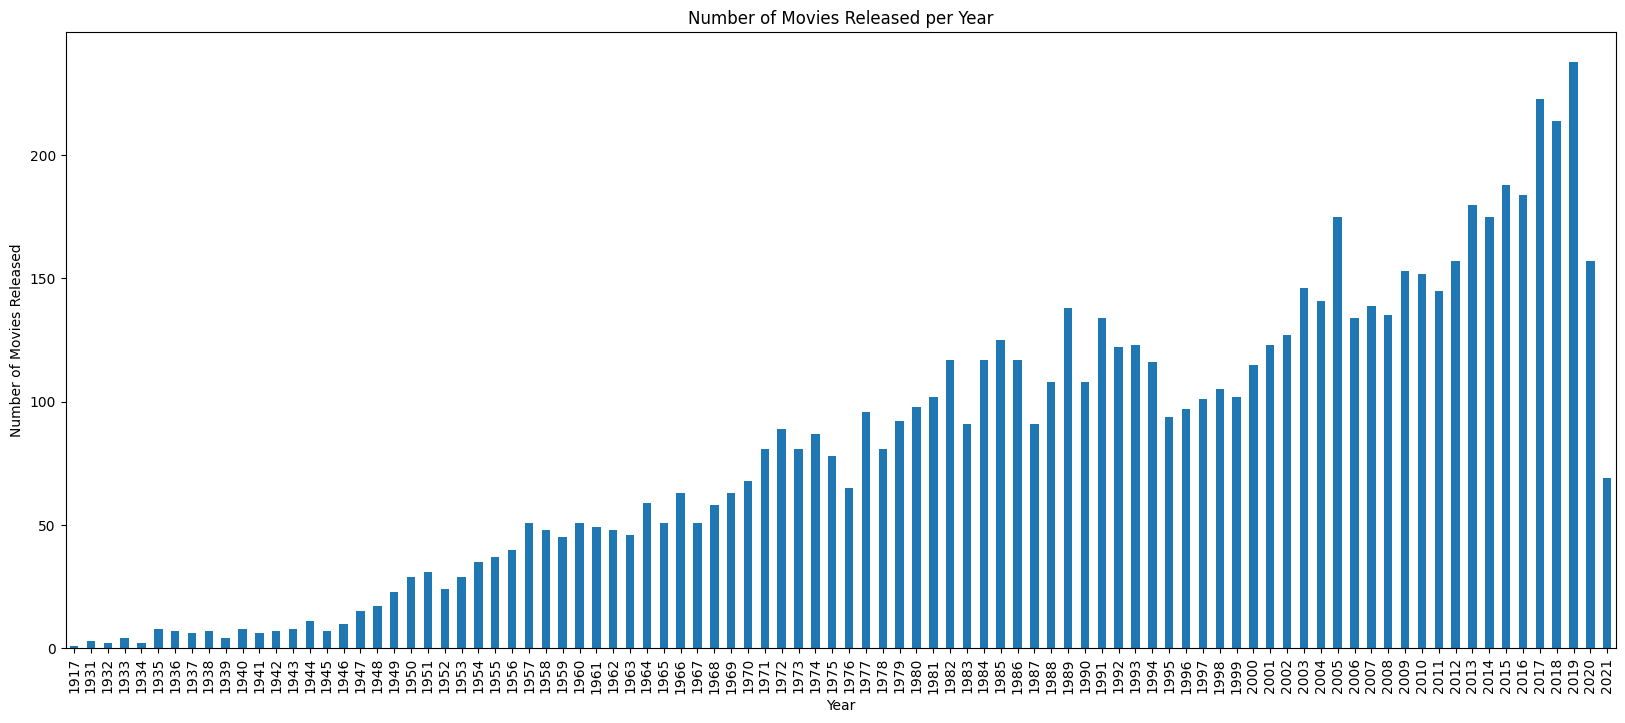

In [ ]:
movies_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(20, 8))
movies_per_year.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.title("Number of Movies Released per Year")
plt.show()

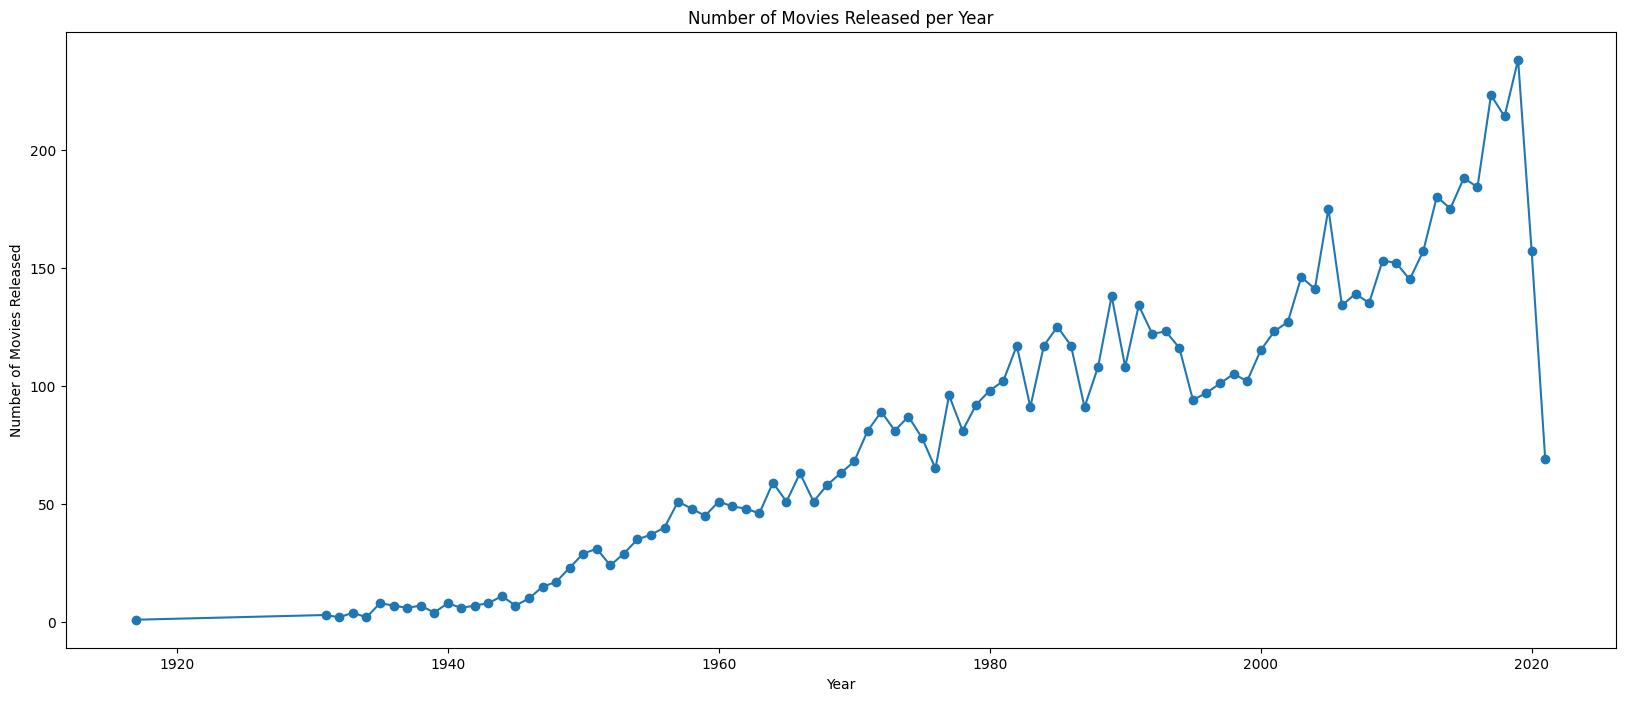

In [ ]:
movies_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(20, 8))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.title("Number of Movies Released per Year")
plt.show()

In [ ]:

# Group by 'Director' and calculate the average rating
director_avg_rating = df.groupby('Director')['Rating'].mean().reset_index()
director_avg_rating.rename(columns={'Rating': 'Director_Avg_Rating'}, inplace=True)

# Merge the average rating back into the original DataFrame
df = df.merge(director_avg_rating, on='Director', how='left')

# Group by 'Actor 1' and calculate the average rating
actor1_avg_rating = df.groupby('Actor 1')['Rating'].mean().reset_index()
actor1_avg_rating.rename(columns={'Rating': 'Actor1_Avg_Rating'}, inplace=True)

# Merge the average rating back into the original DataFrame
df = df.merge(actor1_avg_rating, on='Actor 1', how='left')

# Group by 'Actor 2' and calculate the average rating
actor2_avg_rating = df.groupby('Actor 2')['Rating'].mean().reset_index()
actor2_avg_rating.rename(columns={'Rating': 'Actor2_Avg_Rating'}, inplace=True)

# Merge the average rating back into the original DataFrame
df = df.merge(actor2_avg_rating, on='Actor 2', how='left')

# Group by 'Actor 3' and calculate the average rating
actor3_avg_rating = df.groupby('Actor 3')['Rating'].mean().reset_index()
actor3_avg_rating.rename(columns={'Rating': 'Actor3_Avg_Rating'}, inplace=True)

# Merge the average rating back into the original DataFrame
df = df.merge(actor3_avg_rating, on='Actor 3', how='left')

# Group by 'Genre' and calculate the average rating
genre_avg_rating = df.groupby('Genre')['Rating'].mean().reset_index()
genre_avg_rating.rename(columns={'Rating': 'Genre_Avg_Rating'}, inplace=True)

# Merge the average rating back into the original DataFrame
df = df.merge(genre_avg_rating, on='Genre', how='left')

df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Director_Avg_Rating,Actor1_Avg_Rating,Actor2_Avg_Rating,Actor3_Avg_Rating,Genre_Avg_Rating
0,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,7.000000,6.850000,7.000000,7.000000,6.345910
1,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,4.400000,5.420000,4.400000,4.450000,5.700000
2,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,5.358824,4.788889,5.786667,5.766667,6.224490
3,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,7.500000,5.300000,6.050000,6.500000,6.820000
4,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.600000,5.600000,5.883333,5.600000,5.463636


In [ ]:
# Select the predictor and target variables
X = df[['Director_Avg_Rating', 'Actor1_Avg_Rating', 'Actor2_Avg_Rating', 'Actor3_Avg_Rating', 'Genre_Avg_Rating', 'Duration', 'Votes']]
y = df['Rating']


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the performance of the Linear Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Evaluate the performance of the Random Forest Regressor model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regressor Model:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)


Linear Regression Model:
Mean Squared Error: 0.44711979080390274
R-squared: 0.758683739090498

Random Forest Regressor Model:
Mean Squared Error: 0.3963763326719578
R-squared: 0.7860706314488131


In [ ]:
X.head()

,Director_Avg_Rating,Actor1_Avg_Rating,Actor2_Avg_Rating,Actor3_Avg_Rating,Genre_Avg_Rating,Duration,Votes
0,7.000000,6.850000,7.000000,7.000000,6.345910,109.0,8
1,4.400000,5.420000,4.400000,4.450000,5.700000,110.0,35
2,5.358824,4.788889,5.786667,5.766667,6.224490,147.0,827
3,7.500000,5.300000,6.050000,6.500000,6.820000,142.0,1086
4,5.600000,5.600000,5.883333,5.600000,5.463636,82.0,326


In [ ]:
y.head()

,Rating
0,7.0
1,4.4
2,4.7
3,7.4
4,5.6


In [ ]:
import pandas as pd
data = {'Year': [2016], 'Votes': [58], 'Duration': [121], 'Genre_Avg_Rating': [4.5], 'Director_Avg_Rating': [5.8], 'Actor1_Avg_Rating': [5.9], 'Actor2_Avg_Rating': [5.9], 'Actor3_Avg_Rating': [5.900]}
af = pd.DataFrame(data)
print(af)


   Year  Votes  Duration  Genre_Avg_Rating  Director_Avg_Rating  \
0  2016     58       121               4.5                  5.8   

   Actor1_Avg_Rating  Actor2_Avg_Rating  Actor3_Avg_Rating  
0                5.9                5.9                5.9  
